In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv('placement.csv')
print(df.shape)

df.sample(6)

(1000, 3)


,cgpa,placement_exam_marks,placed
987,6.77,62.0,0
642,7.89,39.0,1
942,7.03,6.0,0
957,6.51,27.0,1
995,8.87,44.0,1
976,6.96,48.0,0


In [127]:
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

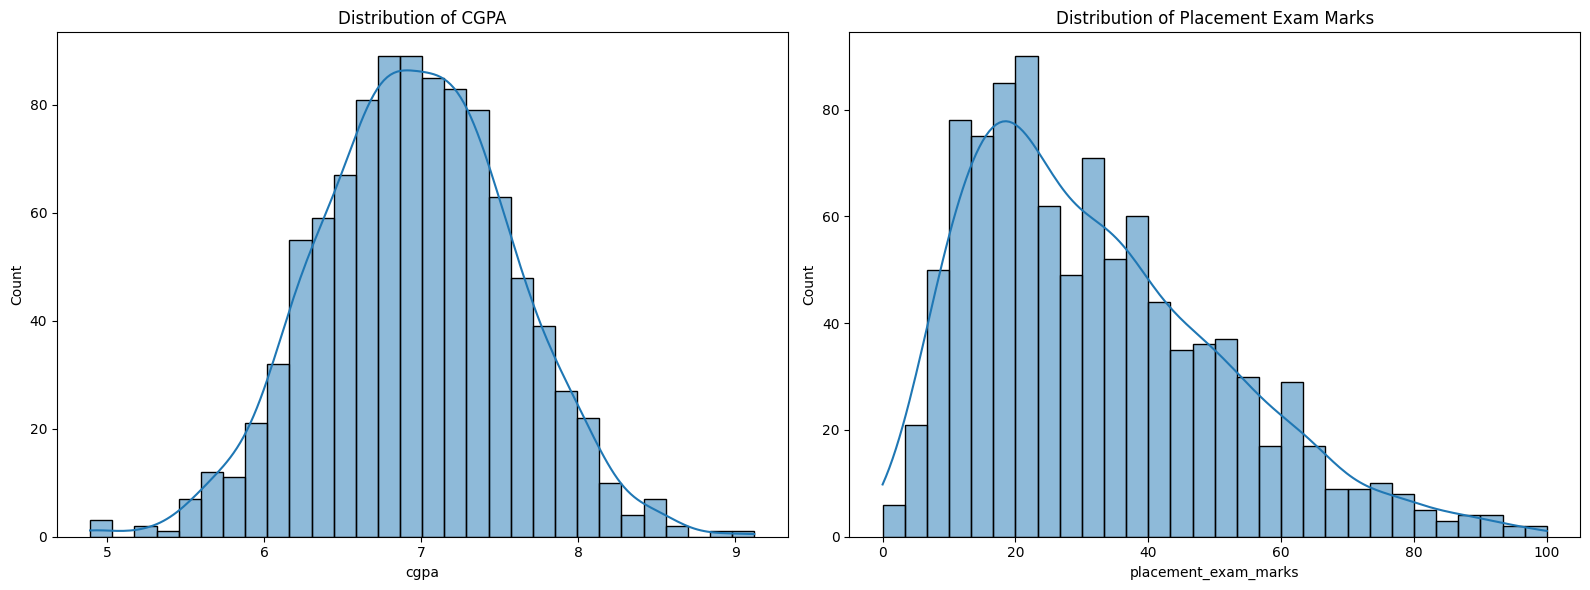

In [128]:
plt.figure(figsize=(16, 6))

# Plot for CGPA
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], bins=30, kde=True)
plt.title('Distribution of CGPA')

# Plot for Placement Exam Marks
plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], bins=30, kde=True)
plt.title('Distribution of Placement Exam Marks')

plt.tight_layout()
plt.show()

Since, the distribution of CGPA is almost normal so we can apply Z-Score method to deal with them.

In [129]:
print("Minimum CGPA is:", df['cgpa'].min())
print("Maximum CGPA is:", df['cgpa'].max())

Minimum CGPA is: 4.89
Maximum CGPA is: 9.12


In [130]:
print("Mean value of CGPA",df['cgpa'].mean())
print("Std value of CGPA",df['cgpa'].std())

Mean value of CGPA 6.96124
Std value of CGPA 0.6158978751323896


In [131]:
# Finding the boundary values (mean-3\sigma, mean+3\sigma)
print("Highest allowed CGPA is:", df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed CGPA is:", df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed CGPA is: 8.808933625397168
Lowest allowed CGPA is: 5.113546374602832


In [132]:
# Finding the outlliers
outliers = df[(df['cgpa'] > 8.808933625397168) | (df['cgpa'] < 5.113546374602832)]
print(outliers.shape)

outliers

(5, 3)


,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## 1. Removing Outliers (Trimming)

In [133]:
# Calculating the Z-score
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.sample(4)

,cgpa,placement_exam_marks,placed,cgpa_zscore
14,7.91,43.0,0,1.540450
78,8.20,12.0,0,2.011307
535,6.49,62.0,0,-0.765127
9,7.75,94.0,1,1.280667


In [134]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [135]:

df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [136]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [137]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
print(new_df.shape)

new_df.sample(4)

(995, 4)


,cgpa,placement_exam_marks,placed,cgpa_zscore
377,6.70,47.0,1,-0.424161
792,7.92,32.0,0,1.556687
756,7.41,30.0,1,0.728627
889,7.39,38.0,0,0.696154


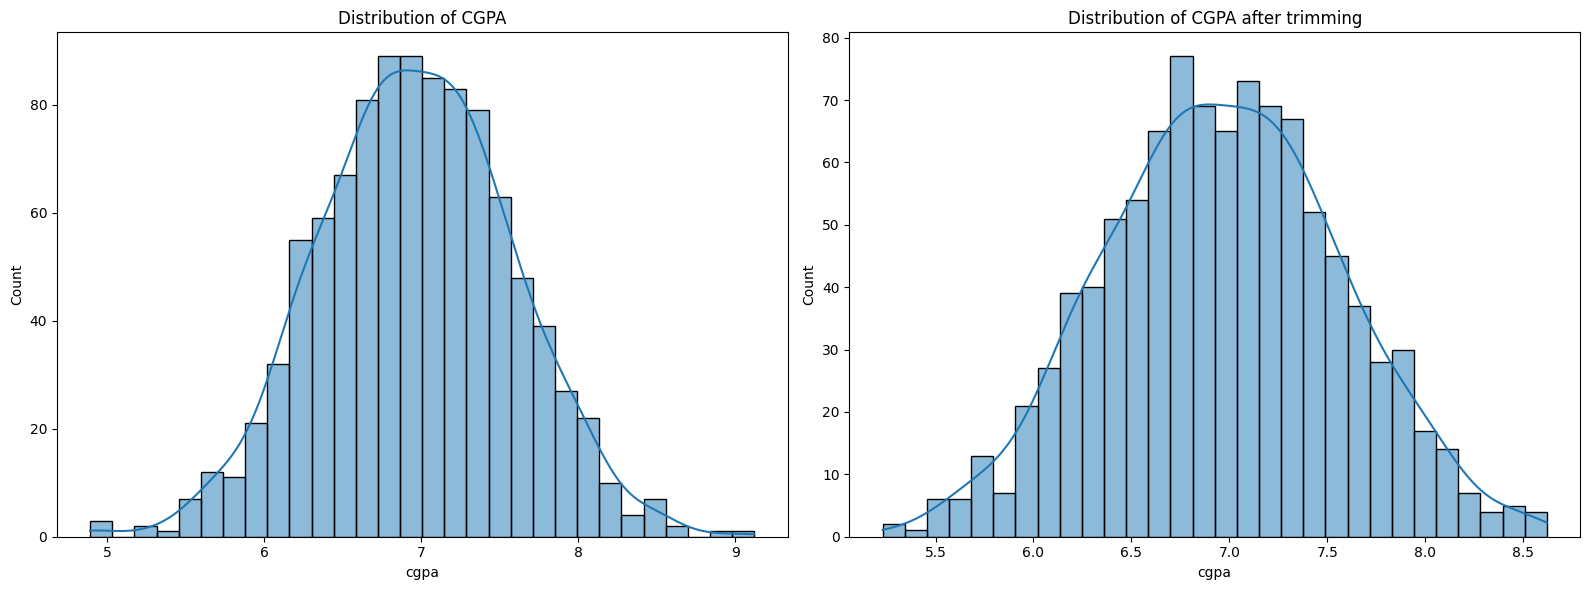

In [138]:
plt.figure(figsize=(16, 6))

# Plot for CGPA 
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], bins=30, kde=True)
plt.title('Distribution of CGPA')

# Plot for CGPA after trimming
plt.subplot(1, 2, 2)
sns.histplot(new_df['cgpa'], bins=30, kde=True)
plt.title('Distribution of CGPA after trimming')

plt.tight_layout()
plt.show()

## 2. Imputing Outliers (Capping)

In [139]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961240,32.225000,0.489000,-1.465494e-16
std,0.615898,19.130822,0.500129,1.000000e+00
min,4.890000,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,9.120000,100.000000,1.000000,3.505062e+00


In [140]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [141]:
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: 5.113546374602832
Upper Limit: 8.808933625397168


In [142]:
new_df_cap = df.copy()

new_df_cap['cgpa'] = np.where(
    new_df_cap['cgpa']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['cgpa']<lower_limit,
        lower_limit,
        new_df_cap['cgpa']
    )
)

In [143]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961240,32.225000,0.489000,-1.465494e-16
std,0.615898,19.130822,0.500129,1.000000e+00
min,4.890000,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,9.120000,100.000000,1.000000,3.505062e+00


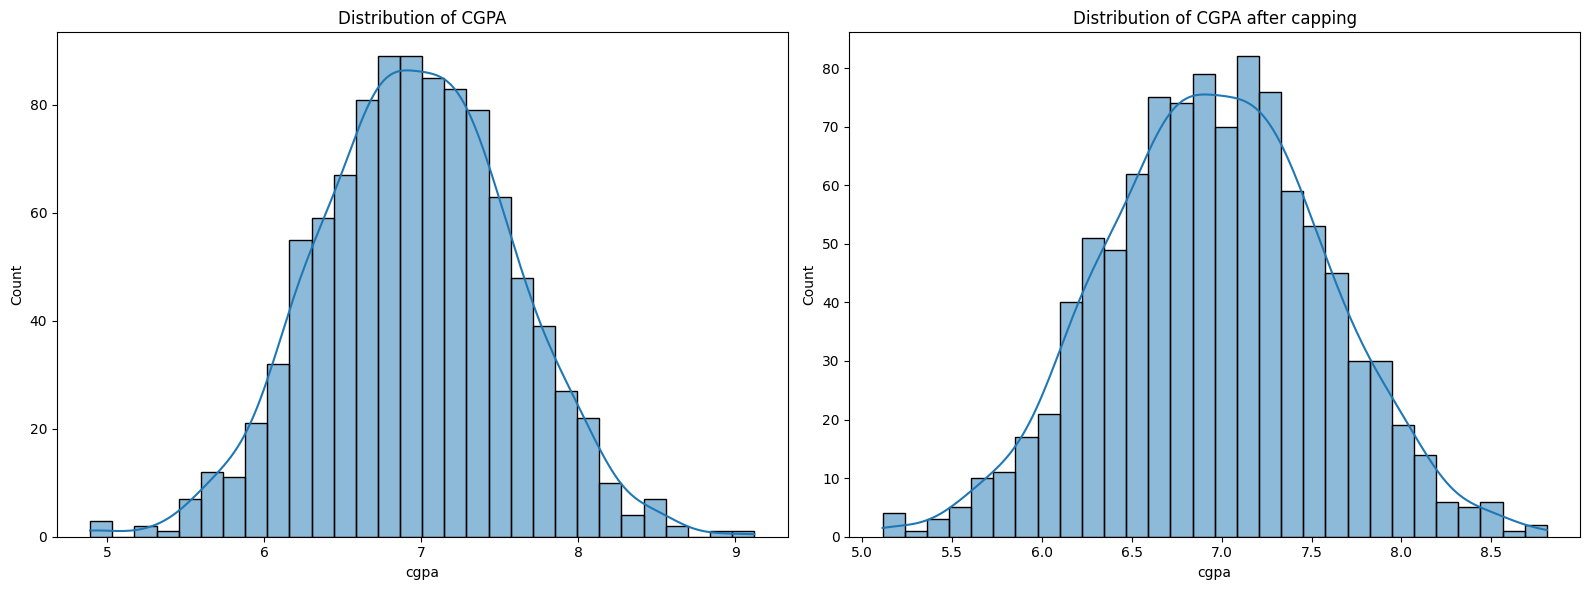

In [144]:
plt.figure(figsize=(16, 6))

# Plot for CGPA 
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], bins=30, kde=True)
plt.title('Distribution of CGPA')

# Plot for CGPA after capping
plt.subplot(1, 2, 2)
sns.histplot(new_df_cap['cgpa'], bins=30, kde=True)
plt.title('Distribution of CGPA after capping')

plt.tight_layout()
plt.show()